# PCA

In [1]:
import pandas as pd
import numpy as np
import sklearn
import os
import matplotlib.pyplot as plt
import time

## 数据预处理

In [2]:
# 加载数据库的列名
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty_level"]

# 加载训练集和测试集
train_path=r"F:\Jupyter\kaggle\data\NSL-KDD\KDDTrain+.txt"
test_path=r"F:\Jupyter\kaggle\data\NSL-KDD\KDDTest+.txt"
df = pd.read_csv(train_path, header=None, names = col_names)
df_test = pd.read_csv(test_path, header=None, names = col_names)
df.drop('difficulty_level',inplace=True,axis=1)
df_test.drop('difficulty_level',inplace=True,axis=1)

#数据集的shape
print('Dimensions of the Training set:',df.shape)
print('Dimensions of the Test set:',df_test.shape)

Dimensions of the Training set: (125973, 42)
Dimensions of the Test set: (22544, 42)


In [3]:
#df_categorical_values————存储了包含'protocol_type'，'service'和'flag'。的训练集数据
#testdf_categorical_values——'protocol_type'，'service'和'flag'的测试集数据
from sklearn.preprocessing import LabelEncoder,OneHotEncoder


categorical_columns=['protocol_type', 'service', 'flag'] 
#将这三个离散特征分离出来
df_categorical_values = df[categorical_columns]
testdf_categorical_values = df_test[categorical_columns]


In [4]:
# protocol type
unique_protocol=sorted(df.protocol_type.unique())
string1 = 'Protocol_type_'
unique_protocol2=[string1 + x for x in unique_protocol]
# service
unique_service=sorted(df.service.unique())
string2 = 'service_'
unique_service2=[string2 + x for x in unique_service]
# flag
unique_flag=sorted(df.flag.unique())
string3 = 'flag_'
unique_flag2=[string3 + x for x in unique_flag]
# 合并
dumcols=unique_protocol2 + unique_service2 + unique_flag2
print(dumcols)

#同理于测试集，由于测试集和训练集只有service有区别，所以只要对service特别处理
unique_service_test=sorted(df_test.service.unique())
unique_service2_test=[string2 + x for x in unique_service_test]
testdumcols=unique_protocol2 + unique_service2_test + unique_flag2

['Protocol_type_icmp', 'Protocol_type_tcp', 'Protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec', 'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher', 'service_harvest', 'service_hostnames', 'service_http', 'service_http_2784', 'service_http_443', 'service_http_8001', 'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap', 'service_link', 'service_login', 'service_mtp', 'service_name', 'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn', 'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u', 'service_other', 'service_pm_dump', 'service_pop_2', 'service_pop_3', 'service_printer', 'service_private', 'service_red_i', 'service_remote_job', 'serv

In [5]:
#df_categorical_values_enc————将dumcols中的类别标签转换为数值。
#testdf_categorical_values_enc同理
df_categorical_values_enc=df_categorical_values.apply(LabelEncoder().fit_transform)
print(df_categorical_values_enc.head())
# test set
testdf_categorical_values_enc=testdf_categorical_values.apply(LabelEncoder().fit_transform)

   protocol_type  service  flag
0              1       20     9
1              2       44     9
2              1       49     5
3              1       24     9
4              1       24     9


In [6]:
# df_cat_data----训练集每一行对于提取出来的每个特征作为列向量，若有这个特征就把值设为1，没有就是0
# testdf_cat_data


enc = OneHotEncoder()
df_categorical_values_encenc = enc.fit_transform(df_categorical_values_enc)
df_cat_data = pd.DataFrame(df_categorical_values_encenc.toarray(),columns=dumcols)
# test set
testdf_categorical_values_encenc = enc.fit_transform(testdf_categorical_values_enc)
testdf_cat_data = pd.DataFrame(testdf_categorical_values_encenc.toarray(),columns=testdumcols)



In [7]:
trainservice = df['service'].tolist()
testservice = df_test['service'].tolist()

train_difference = list(set(trainservice) - set(testservice))
test_difference = list(set(testservice) - set(trainservice))

print(train_difference)
print(test_difference)

string = 'service_'
train_difference = [string + x for x in train_difference]
test_difference = [string + x for x in test_difference]

['http_8001', 'http_2784', 'urh_i', 'red_i', 'aol', 'harvest']
[]


In [8]:
for col in train_difference:
    testdf_cat_data[col] = 0

for col in test_difference:
    df_cat_data[col] = 0

In [9]:
newdf=df.join(df_cat_data)
newdf.drop('flag', axis=1, inplace=True)
newdf.drop('protocol_type', axis=1, inplace=True)
newdf.drop('service', axis=1, inplace=True)
# test data
newdf_test=df_test.join(testdf_cat_data)
newdf_test.drop('flag', axis=1, inplace=True)
newdf_test.drop('protocol_type', axis=1, inplace=True)
newdf_test.drop('service', axis=1, inplace=True)
print(newdf.shape)
print(newdf_test.shape)

(125973, 123)
(22544, 123)


In [10]:
labeldf=newdf['label']
labeldf_test=newdf_test['label']

#把.洗掉
labeldf = labeldf.str.rstrip('.')
labeldf_test = labeldf_test.str.rstrip('.')
newlabeldf=labeldf.replace({'normal':0,
                            'neptune':1,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 
                             'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2,
                             'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'worm': 3,
                             'httptunnel': 4,'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})
newlabeldf_test=labeldf_test.replace({'normal' : 0,
                             'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 
                             'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2,
                             'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'worm': 3,
                             'httptunnel': 4,'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})

newdf['label'] = newlabeldf
newdf_test['label'] = newlabeldf_test
# print(newdf['label'].tail())

In [11]:
print('Dimensions of PCA:' ,newdf.shape)
print('Dimensions of PCA:' ,newdf_test.shape)

Dimensions of PCA: (125973, 123)
Dimensions of PCA: (22544, 123)


In [12]:
combined_features_list=['duration',
 'Protocol_type_udp',
 'dst_host_srv_diff_host_rate',
 'Protocol_type_tcp',
 'flag_S0',
 'dst_host_diff_srv_rate',
 'dst_host_rerror_rate',
 'logged_in',
 'dst_host_same_src_port_rate',
 'src_bytes',
 'rerror_rate',
 'service_http',
 'count',
 'Protocol_type_icmp',
 'dst_host_same_srv_rate',
 'is_guest_login',
 'srv_count',
 'dst_host_srv_count',
 'service_ecr_i',
 'dst_host_srv_rerror_rate',
 'srv_serror_rate',
 'dst_bytes',
 'dst_host_count',
 'dst_host_serror_rate',
 'service_eco_i',
 'same_srv_rate',
 'service_finger',
 'srv_diff_host_rate',
 'wrong_fragment',
 'dst_host_srv_serror_rate',
 'service_domain_u',
 'service_private',
 'service_smtp',
 'hot',
 'num_compromised']
# 计算列表长度
num_items = len(combined_features_list)

# 输出列表中的项数
print("column列表中的项数为:", num_items)


column列表中的项数为: 35


In [13]:
# 将数据集分割为特征（X）和目标变量（Y）
# assign X as a dataframe of feautures and Y as a series of outcome variables
X = newdf[combined_features_list]
Y = newdf.label

X_test = newdf_test[combined_features_list]
Y_test = newdf_test.label
#colNames 就是一个包含 X 中所有列名称的列表
colNames=list(X)
colNames_test=list(X_test)

In [14]:
from sklearn import preprocessing
#全部特征
scaler1 = preprocessing.StandardScaler().fit(X)
X=scaler1.transform(X) 

scaler2 = preprocessing.StandardScaler().fit(X_test)
X_test=scaler2.transform(X_test) 

In [15]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X)

In [16]:
# 每个主成分的贡献率
er = pca.explained_variance_ratio_
er

array([2.19650334e-01, 1.17262721e-01, 1.09703775e-01, 8.35602618e-02,
       5.54897974e-02, 5.32682726e-02, 3.80096130e-02, 3.61226908e-02,
       3.15962821e-02, 2.91644442e-02, 2.86032760e-02, 2.85436496e-02,
       2.78391609e-02, 2.12686533e-02, 1.83877711e-02, 1.70499665e-02,
       1.56786349e-02, 1.38430302e-02, 9.97760780e-03, 9.08065711e-03,
       7.98938103e-03, 6.00747897e-03, 4.53482239e-03, 3.96324127e-03,
       2.56105999e-03, 2.27825312e-03, 2.11422809e-03, 1.56872888e-03,
       1.35963347e-03, 1.08396351e-03, 9.70673693e-04, 6.71718878e-04,
       4.83160690e-04, 3.13057026e-04, 1.83484971e-28])

In [17]:
print(pca.explained_variance_ratio_.sum())    # 降维后信息保留量

0.9999999999999999


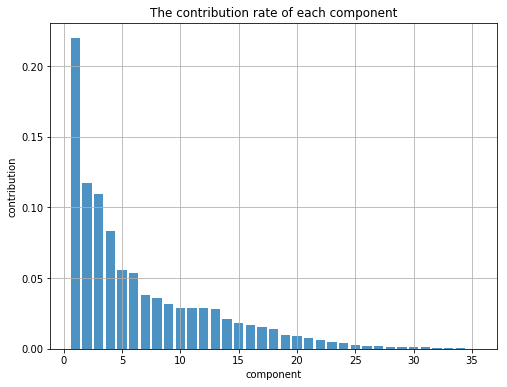

In [18]:
plt.figure(figsize=(8, 6))

# 绘制每个主成分的贡献率的条形图
plt.bar(range(1, len(er) + 1), er, align='center', alpha=0.8)

# 添加标题和标签
plt.title("The contribution rate of each component")
plt.xlabel("component")
plt.ylabel("contribution")

# 显示图形
plt.grid(True)
plt.show()

In [26]:
for  i in range(1, 36):
    print("主成分个数：", i, "累积贡献率：", er[:i].sum())


主成分个数： 1 累积贡献率： 0.21965033374701476
主成分个数： 2 累积贡献率： 0.3369130548061114
主成分个数： 3 累积贡献率： 0.4466168295831661
主成分个数： 4 累积贡献率： 0.5301770913775352
主成分个数： 5 累积贡献率： 0.5856668887717553
主成分个数： 6 累积贡献率： 0.6389351613772958
主成分个数： 7 累积贡献率： 0.6769447744172179
主成分个数： 8 累积贡献率： 0.7130674651988818
主成分个数： 9 累积贡献率： 0.7446637472924716
主成分个数： 10 累积贡献率： 0.7738281915326151
主成分个数： 11 累积贡献率： 0.8024314675026609
主成分个数： 12 累积贡献率： 0.8309751171445108
主成分个数： 13 累积贡献率： 0.8588142780238522
主成分个数： 14 累积贡献率： 0.8800829313207313
主成分个数： 15 累积贡献率： 0.8984707024628237
主成分个数： 16 累积贡献率： 0.9155206689471811
主成分个数： 17 累积贡献率： 0.9311993038819925
主成分个数： 18 累积贡献率： 0.9450423340717098
主成分个数： 19 累积贡献率： 0.9550199418693225
主成分个数： 20 累积贡献率： 0.9641005989839488
主成分个数： 21 累积贡献率： 0.9720899800149182
主成分个数： 22 累积贡献率： 0.9780974589833307
主成分个数： 23 累积贡献率： 0.9826322813715043
主成分个数： 24 累积贡献率： 0.9865955226449145
主成分个数： 25 累积贡献率： 0.9891565826348443
主成分个数： 26 累积贡献率： 0.9914348357584165
主成分个数： 27 累积贡献率： 0.9935490638498405
主成分个数： 28 累积贡献率： 0.9951177927306591


In [27]:
# 每个主成分的贡献率
explained_variance_ratio = pca.explained_variance_ratio_

# 计算累积贡献率
cumulative_variance_ratio = explained_variance_ratio.cumsum()

# 输出累积贡献率超过0.9的主成分的个数
n_components_90 = np.argmax(cumulative_variance_ratio >= 0.9) + 1
print("累积贡献率超过0.9的主成分个数：", n_components_90)

# 输出累积贡献率超过0.9的主成分的特征向量
top_components = pca.components_[:n_components_90]
for i, component in enumerate(top_components):
    print(f"主成分 {i+1} 的特征向量：{component}")

累积贡献率超过0.9的主成分个数： 16
主成分 1 的特征向量：[ 4.71827721e-03 -6.01667151e-02 -1.02310014e-01  1.06515863e-01
  3.16542685e-01  8.08517170e-02  3.81867959e-02 -2.31408218e-01
 -1.06078473e-01  7.78415303e-05  4.05297401e-02 -2.03433561e-01
  2.19630408e-01 -8.81712074e-02 -3.14037821e-01 -1.43849766e-02
 -5.11356637e-02 -2.78342521e-01 -3.17684507e-02  3.99068704e-02
  3.16422271e-01  1.64892512e-04  2.10642991e-01  3.19015899e-01
 -8.93169147e-02 -3.29386207e-01  3.71756408e-02 -1.34334991e-01
 -3.42155914e-03  3.19205404e-01 -6.58971318e-02  1.71985351e-01
 -5.24229982e-02 -1.57912421e-02 -1.50371122e-03]
主成分 2 的特征向量：[ 0.11376199  0.18720334  0.14578581 -0.31399663 -0.13404637  0.22556989
  0.2722361  -0.30537835  0.27464544  0.00522574  0.26503095 -0.26103111
  0.15120814  0.24707034 -0.1083887  -0.03331901  0.19212526 -0.16034944
  0.16866208  0.2650098  -0.1354849   0.00658129  0.0448859  -0.13131154
  0.17632843 -0.02749236 -0.01856016  0.04369247  0.06761115 -0.13199006
  0.12228144  0.0939

In [53]:
pca = PCA(n_components=28)
X_pca = pca.fit_transform(X)
X_test_pca=pca.transform(X_test)
print(pca.explained_variance_ratio_.sum())    # 降维后信息保留量

0.9951177927306591


In [54]:
from sklearn.ensemble import RandomForestClassifier
start_time = time.time()

# all features
clf=RandomForestClassifier(random_state=0)
clf.fit(X, Y)
end_time = time.time()
# 计算执行时间
training_time = end_time - start_time
print(f"训练时间: {training_time:.2f} 秒")

训练时间: 0.68 秒


In [55]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
# 使用 cross_val_predict 进行交叉验证预测
start_time = time.time()

y_pred = cross_val_predict(clf, X_test_pca, Y_test, cv=10)

end_time = time.time()
training_time = end_time - start_time
print(f"训练时间: {training_time:.2f} 秒")
# 混淆矩阵
pd.crosstab(Y_test, y_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

训练时间: 5.96 秒


Predicted attacks,0,1,2,3,4
Actual attacks,,,,,
0,9473,29,41,166,2
1,30,7420,8,0,0
2,60,10,2346,4,1
3,214,6,5,2516,13
4,20,1,3,21,155


In [56]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,f1_score
print(classification_report(Y_test, y_pred, digits=3))

             precision    recall  f1-score   support

          0      0.967     0.975     0.971      9711
          1      0.994     0.995     0.994      7458
          2      0.976     0.969     0.973      2421
          3      0.929     0.914     0.921      2754
          4      0.906     0.775     0.836       200

avg / total      0.972     0.972     0.972     22544



In [57]:
from sklearn.metrics import confusion_matrix

# 计算混淆矩阵
conf_matrix = confusion_matrix(Y_test, y_pred)

# 提取各分类的真正例、假正例、真负例、假负例
true_positives = np.diag(conf_matrix)
false_positives = np.sum(conf_matrix, axis=0) - true_positives
false_negatives = np.sum(conf_matrix, axis=1) - true_positives
true_negatives = np.sum(conf_matrix) - (true_positives + false_positives + false_negatives)

# 计算各分类的准确率
class_accuracies = true_positives / (true_positives + false_negatives)

# 将整体准确率加入到列表中
overall_accuracy = np.sum(true_positives) / np.sum(conf_matrix)

# 创建包含准确率的数据帧
index = [str(i) for i in range(len(class_accuracies))] + ['Overall Accuracy']
df_ac = pd.DataFrame({'Accuracy': np.append(class_accuracies, overall_accuracy)}, index=index)

# 打印数据帧
print(df_ac)

                  Accuracy
0                 0.975492
1                 0.994905
2                 0.969021
3                 0.913580
4                 0.775000
Overall Accuracy  0.971877
